# Imports

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time

# Star Detection

In [88]:
plt.rcParams["figure.figsize"] = (12, 18)

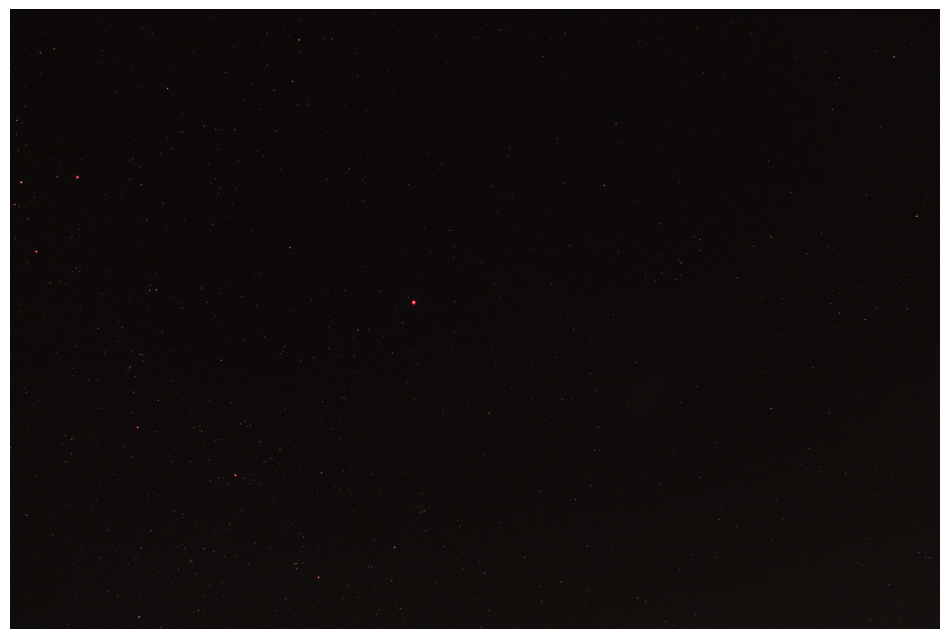

In [89]:
image = cv2.imread("../data/stars_00.jpg")
plt.axis("off")
plt.imshow(image)

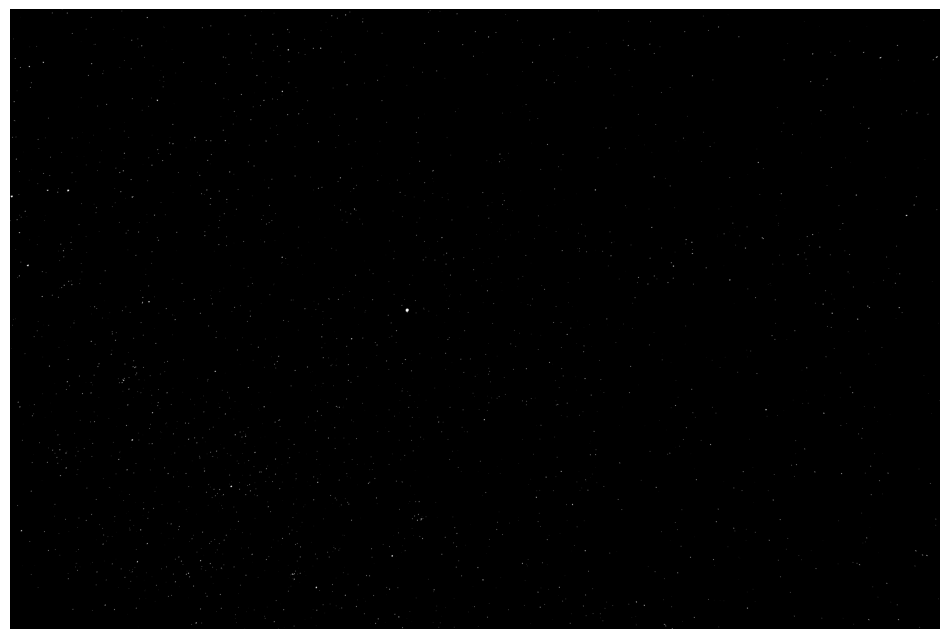

In [82]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Threshold the image to create a binary image
ret, binary_image = cv2.threshold(gray_image, 40, 255, 0)
plt.axis("off")
plt.imshow(binary_image, cmap="gray")

## Connected Component Labeling (Blob Extraction)

2243 stars detected!
Execution time: 85.96264719963074 seconds


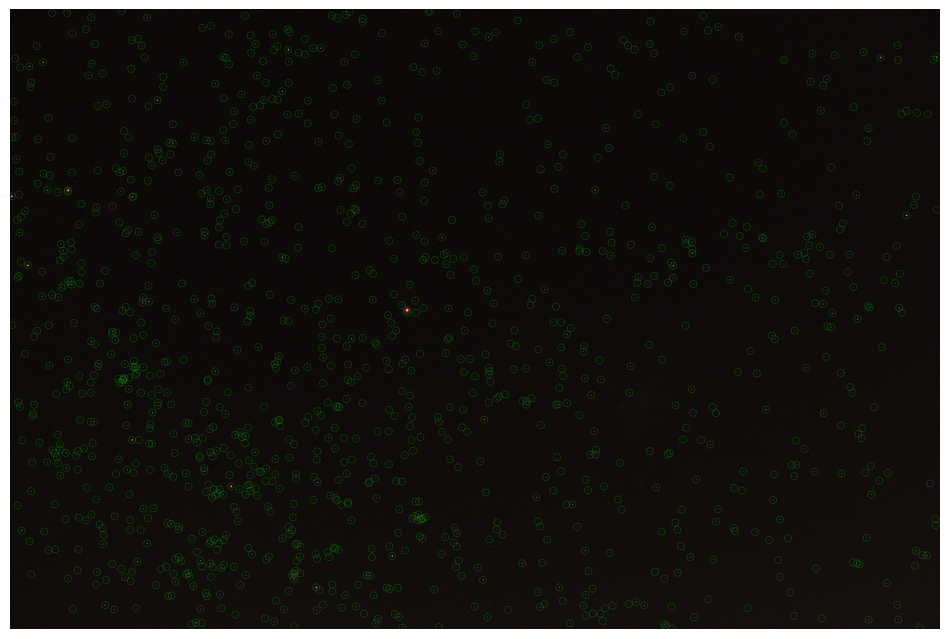

In [83]:
blob_extraction_image = image.copy()
start = time.time()
# Detect connected components (blobs) in the binary image
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image)

# Set a minimum size for the blobs to be detected
min_size = 5

# Loop through the detected blobs and draw a circle on the output image
for i in range(1, num_labels):
    if stats[i, cv2.CC_STAT_AREA] > min_size:
        # Get the centroid of the blob
        center = tuple(map(int, centroids[i]))
        # Find the minimum enclosing circle of the blob
        radius, _ = cv2.minEnclosingCircle(np.argwhere(labels == i))
        # Draw the circle on the output image
        blob_extraction_image = cv2.circle(
            blob_extraction_image, center, 20, (0, 255, 0), 1
        )
end = time.time()

print(f"{num_labels} stars detected!")
print(f"Execution time: {(end - start)} seconds")
plt.axis("off")
plt.imshow(blob_extraction_image);

## Hough Transform

501 stars detected!
Execution time: 0.4602017402648926 seconds


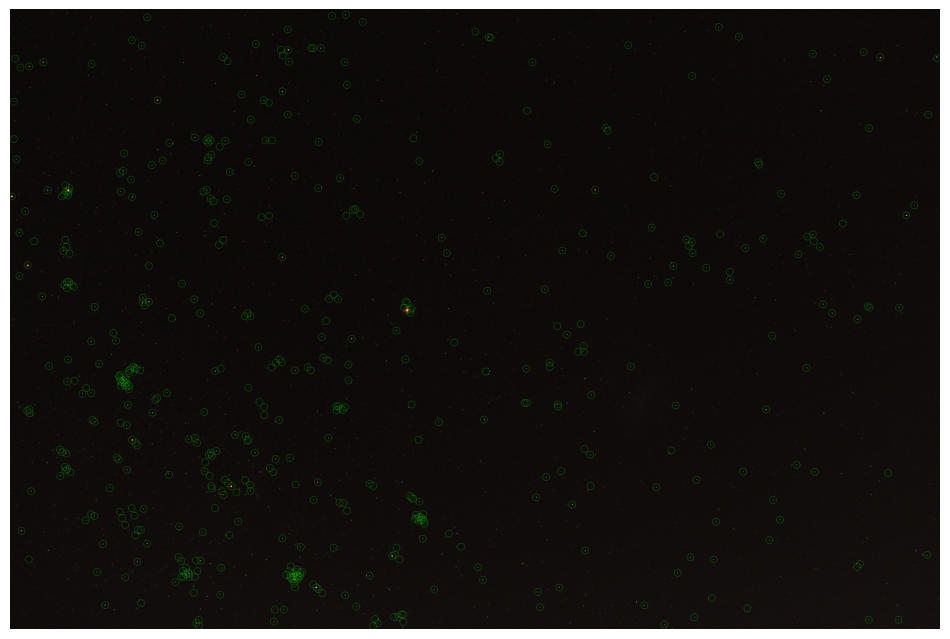

In [84]:
hough_transform_image = image.copy()

start = time.time()
circles = cv2.HoughCircles(
    binary_image,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=10,
    param1=100,
    param2=5,
    minRadius=2,
    maxRadius=50,
)

circles = np.uint16(np.around(circles))
for i in circles[0, :]:
    # draw the outer circle
    cv2.circle(hough_transform_image, (i[0], i[1]), 20, (0, 255, 0), 1)
end = time.time()

print(f"{len(circles[0])} stars detected!")
print(f"Execution time: {(end - start)} seconds")
plt.axis("off")
plt.imshow(hough_transform_image);

## Results Comparison

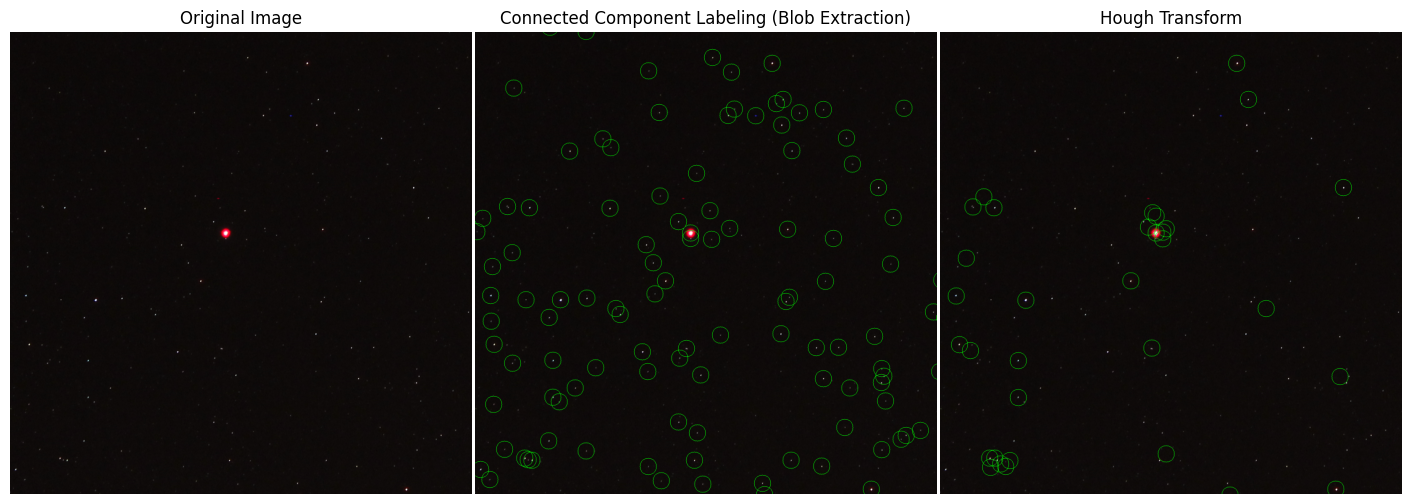

In [85]:
images = [image, blob_extraction_image, hough_transform_image]
titles = [
    "Original Image",
    "Connected Component Labeling (Blob Extraction)",
    "Hough Transform",
]
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
for i, (img, title) in enumerate(zip(images, titles)):
    if i == 0:
        ax[i].imshow(img[1200:2300, 1700:2800])
    else:
        ax[i].imshow(img[1200:2300, 1700:2800, :])
    ax[i].axis("off")
    ax[i].set_title(title)

plt.subplots_adjust(wspace=0, hspace=0)

In [86]:
# Save cropped result images
images = [image, blob_extraction_image, hough_transform_image]
filenames = [
    "original_image_cropped",
    "connected_component_star_detection",
    "hough_transform_star_detection",
]

plt.figure(figsize=(8, 6))
for i, (img, filename) in enumerate(zip(images, filenames)):
    if i == 0:
        img = img[1200:2300, 1700:2800]
    else:
        img = img[1200:2300, 1700:2800, :]

    cv2.imwrite(f"../images/{filename}.png", img)

<Figure size 800x600 with 0 Axes>